# Projet d'optimisation Groupe 6 : Tout un fromage

## Partie 1 : Modélisation

#### Notations générales

Dans tous le problème, on notera les différents produits à l'aide des indices suivants : $B$ pour le beurre, $G$ pour le gouda, $E$ pour l'edam et $LT$ pour le lait (transformé).
On notera également l'ensemble des produits $Prod = \{B, G, E, LT \}$ pour simplifier certaines expressions faisant appelle aux quatres produits. De la même façon, on note $LB$ l'indice pour le lait brut utilisé dans la fabrication des produits précédents.

Également, en considérant une grandeur quelconque $Y$, celle ci sera indexée de la forme $Y_k^i$ avec $k \in Prod$ désignant le produit concerné, et $i \in \N$ indiquant l'année à laquelle la grandeur est observée, afin de discrétiser le problème dans le temps. On note $\Delta^i Y_k = Y^i_k - Y^{i-1}_k$. Il est possible de parfois omettre l'indice $i$ pour plus de lésibilité lorsque qu'il n'y a aucune ammbiguite.

Finalement, on introduit les grandeurs suivantes :
- $P^i_k$ est le prix du produit $k$ pendant l'année $i$
- $Q^i_k$ est la quantité produite et commerciable du produit $k$ pendant l'année $i$

#### Questions

1. En introduisant l’élasticité-prix de chacun des produits, écrire la relation entre les variations de prix et de quantités produites. Les fromages (gouda et edam) étant des produits ”complémentaires” (qui peuvent se substituer l’un à l’autre), on introduira de plus l’élasticité-prix croisée entre ces deux produits.

On définit l'élasticité-prix d'un produit $k \in Prod$ comme le rapport entre le taux de variation de la demande et le taux de variation du prix du produit. Ainsi, on pose $e$ telle que :

$$ \forall k \in Prod, e_k = \frac{\frac{\Delta Q_k}{Q_k}}{\frac{\Delta P_k}{P_k}} = 
\frac{\Delta Q_k}{\Delta P_k} \times \frac{P_k}{Q_k}$$

Ce rapport est généralement négatif, traduisant qu'une augmentation du prix fait chuter la demande.

Il est a noté que les deux fromages sont des produits substituables, c'est à dire qu'une augmentation du prix de l'un va diminuer la quantité demandée de celui ci, mais va également produire une augmentation de la quantité demandé de l'autre, puisque les consommateurs se rabattent alors sur l'autre. On peut alors définir l'élasticité-prix croisée pour qualifier cette relation.

On pose donc $e_{G \rightarrow E} = \frac{\frac{\Delta Q_G}{Q_G}}{\frac{\Delta P_E}{P_E}} = 
\frac{\Delta Q_G}{\Delta P_E} \times \frac{P_E}{Q_G}$ et de manière symmétrique $e_{E \rightarrow G} = \frac{\Delta Q_E}{\Delta P_G} \times \frac{P_G}{Q_E}$

Le concept des produits substituables se traduit alors par une élasticité-prix croisée positive.

On peut alors remarquer la relation $e_{G \rightarrow E} e_{E \rightarrow G} = e_G e_E$.

2. Le lait brut possède une quantité de matière grasse totale répartie entre les quatre produits. À partir
de la teneur en matière grasse de chacun des produits, écrire la contrainte correspondante.

On se donne à notre disposition la teneur en matière grasse du produit $k$ notée $\tau_{g,k}$ ($g$ pour gras). Ces nombres sont nécessairement dans le segment $[0,1]$. On suppose que celle ci sont constantes au cours du temps.

Ainsi, la quantité de matière grasse à notre disposition pendant l'année $i$ est $\tau_{g,LB} Q_{LB}^i$.

On arrive donc à écrire, par une équation de conservation de la matière grasse, la contrainte suivante :
$$\tau_{g,LB} Q_{LB}^i = \sum_{k \in Prod} {\tau_{g,k} Q_{k}^i}$$

3. De même, le lait brut a une teneur totale en lactose. Formuler la contrainte correspondante

Par un raisonnement exactement similaire, en pausant $\tau_{l,k}$ la teneur en lactose du produit $k$, on trouve :
$$\tau_{l,LB} Q_{LB}^i = \sum_{k \in Prod} {\tau_{l,k} Q_{k}^i}$$

4. Afin de garantir la paix sociale, la moyenne des changements de prix relatifs ne doit pas être positive.
Écrire la contrainte correspondant (en tenant compte du fait que la moyenne est en fait pondérée par
la part de chacun des produits dans le budget).

En statistiques, considérant un ensemble de données $ M = \{m_{1},m_{2},\dots ,m_{n}\}$, 
et les poids non-négatifs correspondants $ \alpha =\{\alpha _{1},\alpha _{2},\dots ,\alpha _{n}\}$
la moyenne pondérée $\bar{m}$ est calculée suivant la formule :
$ {\bar {m}}={\frac {\sum _{i=1}^{n}\alpha _{i}m_{i}}{\sum _{i=1}^{n}\alpha _{i}}}$

Dans notre cas, on souhaite regarder la moyenne des changement de prix relatifs, ce qui correspond à l'ensemble de données des $\frac{\Delta P_k}{P_k}$ avec $k \in Prod$.
On se prend donc un jeu de quatre poids non négatifs $\{ \alpha_k , k \in Prod \}$, et l'on se fixe la contrainte que la moyenne suivante soit négative ou nulle (Rq : comme $\sum _{k\in Prod}\alpha _{i}$ est strictement positive, on peut omettre la division en gardant un critère équivalent, ce qui simplifiera les calculs)

$$ \sum_{k \in Prod}{\alpha_k \frac{\Delta P_k}{P_k}} \leq 0$$

5. Formuler le problème d'optimisation sous contrainte (au nombre de 7)

Si l'on s'en réfère au cours, on cherche à se ramener à un problème de minimisation dans $R^n$ d'une fonction différentiable f à valeurs dans $R$ sous la contrainte $c(x) \leq 0$, c'est à dire un problème à contraintes inégalités, puisque certaines de nos contraintes sont déjà des inégalités.

Il reste donc à transformer les contraintes d'égalités en inégalités, et à trouver les contraintes qui manqueraient. Puisque les contraintes d'égalités sont les équations de conservation de matière grasse et de lactose, on peut supposer qu'il n'est pas impossible qu'une partie en soit perdue lors du processus, et donc obtenir à la place :
$$\sum_{k \in Prod} {\tau_{g,k} Q_{k}^i} \leq \tau_{g,LB} Q_{LB}^i$$
$$\sum_{k \in Prod} {\tau_{l,k} Q_{k}^i} \leq \tau_{l,LB} Q_{LB}^i $$

Avec la contrainte de la question 4, nous en avons maintenant 3. Il en manque donc 4. Quelles inégalités triviales peut-on obtenir ? 
On pourrait penser à des inégalités sur les prix. Mais ceux-ci sont-ils nécessairement positifs ? En réalité, non, car il serait tout à fait possible que les prix soient négatifs dans le sens où l'Etat paie pour que les gens consomment du fromage... 
Quid des quantités ? On se rend compte que celles-ci ne peuvent pas être négatives au sens où on les a définies. Ainsi il vient pour toute année i et tout produit k :
$$0 \leq Q^i_k$$

On a maintenant bien 7 contraintes.
Par ailleurs, 6 d'entre elles ne dépendent que des quantités. Pour simplifier le problème, essayons de ramener la 7ème, celle de la question 4, aux mêmes inconnues :
$$ \sum_{k \in Prod}{\alpha_k \frac{\Delta P_k}{P_k}}=\sum_{k \in Prod}{\alpha_k \frac{\Delta Q_k}{Q_k} \frac{1}{e_k}}$$

D'où la possibilité d'écrire :
$$\sum_{k \in Prod}{\alpha_k \frac{\Delta Q_k}{Q_k} \frac{1}{e_k}} \leq 0$$



$$$$
$$$$

Que cherche-t-on à maximiser ? Les revenus de l'année i+1 sachant toutes les variables de l'année i, soit $\sum_{k \in Prod} {P_{k}^{i+1} Q_{k}^{i+1}}$.

Peut-on exprimer cette grandeur uniquement en fonction des inconnues quantités de l'année i+1 ? Oui, en discrétisant les élasticités de la question 1., on peut écrire les prix de l'année $i+1$ :
$P_{k}^{i+1}=P_k^{i}+ \frac{1}{e_k P_k^i} \frac{Q_k^{i+1} - Q_k^i}{Q_k^i}$



#### Problème

Ainsi, on va poser la fonction à minimiser :
$$f(\vec{Q^{i+1}})=- \sum_{k \in Prod} {(P_k^{i}+ \frac{1}{e_k P_k^i} \frac{Q_k^{i+1} - Q_k^i}{Q_k^i}) * Q_{k}^{i+1}}$$

Où 
$$
\vec{Q^{i+1}}=\begin{pmatrix}
Q_B^{i+1} \\[3mm]
Q_G^{i+1} \\[3mm]
Q_E^{i+1} \\[3mm]
Q_{LT}^{i+1}\\[3mm]
\end{pmatrix}
$$

Et on pose la contrainte :
$$c(\vec{Q^{i+1}})=\begin{pmatrix}
- Q_B^{i+1} \\[3mm]
- Q_G^{i+1} \\[3mm]
- Q_E^{i+1} \\[3mm]
- Q_{LT}^{i+1}\\[3mm]
\sum_{k \in Prod} {\tau_{g,k} Q_{k}^{i+1}} - \tau_{g,LB} Q_{LB}^{i+1}\\[3mm]
\sum_{k \in Prod} {\tau_{l,k} Q_{k}^{i+1}} - \tau_{l,LB} Q_{LB}^{i+1}\\[3mm]
\sum_{k \in Prod}{\alpha_k \frac{\Delta Q_k^{i+1}}{Q_k^{i+1}} \frac{1}{e_k}}\\
\end{pmatrix}$$



On peut vérifier que f et c sont différentiables. On a bien le problème de minimisation :
$$\min_{c(\vec{Q^{i+1}}) \leq 0}{f(\vec{Q^{i+1}})}$$

## Partie 2 : Etude du problème

### 1) Ecriture du problème sous forme vectorielle

Nous allons dans un premier temps essayer d'écrire le problème de manière plus synthétique sous forme vectorielle.

#### a) Contraintes de positivité des quantités
Concentrons nous d'abord sur les contraintes d'inégalités. La contrainte $Q_B^{i+1} \geq 0$ peut naturellement avec les notations précédente se réecrire avec la fonction $c_1(\vec{x}) = -(\vec{e_1}|\vec{x})$ où $\vec{e_1} = \begin{pmatrix} 1&0&0&0 \end{pmatrix}$, car alors $c_1(\vec{Q_B^{i+1}}) = -
\begin{pmatrix} 1&0&0&0 \end{pmatrix} . 
{\begin{pmatrix}Q_B^{i+1} & Q_G^{i+1} & Q_E^{i+1} & Q_{LT}^{i+1} \end{pmatrix}}^T
= -Q_B^{i+1} \leq 0$.

De manière strictement identique en utilisant les vecteurs $\vec{e_2}, \vec{e_3}$ et $\vec{e_4}$, les 4 premières contraintes sont linéaires.

#### b) Contraintes de conservation
Concernant la contrainte suivante, on peut remarquer qu'elle peut également se réécrire en posant le vecteur $\vec{\tau_g} = \begin{pmatrix} \tau_{g,B} &\tau_{g,G} &\tau_{g,E} &\tau_{g,LT} \end{pmatrix}$, avec la fonction 
$c_5 (\vec{Q_B^{i+1}}) = \vec{\tau_g}.\vec{Q_B^{i+1}} -\tau_{g,LB}Q_{LB}^{i+1}\leq 0$. 

Il en est exactement de même pour la contrainte suivante à l'aide du vecteur 
$\vec{\tau_l} = \begin{pmatrix} \tau_{l,B} &\tau_{l,G} &\tau_{l,E} &\tau_{l,LT} \end{pmatrix}$

#### c) Contrainte de bonheur
La contrainte $\sum_{k \in Prod}{\alpha_k \frac{\Delta Q_k}{Q_k} \frac{1}{e_k}} \leq 0$ est une peu plus délicate. On peut la réécrire comme :
$$\sum_{k \in Prod}{\alpha_k \frac{Q_k^{i+1}-Q_k^{i}}{Q_k^i} \frac{1}{e_k}} =
\sum_{k \in Prod}{Q_k^{i+1} \frac{\alpha_k}{e_k Q_k^{i}}} - \sum_{k \in Prod}{\frac{\alpha_k }{e_k}}$$
En notant $C = \sum_{k \in Prod}{\frac{\alpha_k }{e_k}}$ (qui est donc une constante du problème), on peut poser 
$c_6 (\vec{Q^{i+1}}) = \vec{Q^{i+1}}.\vec{\alpha_i} - C$ avec 
$\vec{\alpha_i} = \begin{pmatrix} \frac{\alpha_B}{Q_B^i e_B} & \frac{\alpha_G}{Q_G^i e_G} & \frac{\alpha_E}{Q_E^i e_E} & \frac{\alpha_{LT}}{Q_{LT}^i e_{LT}} \end{pmatrix}$.

#### d) Synthèse des contraintes

On remarque que **toutes les contraintes sont affines** (voir linéaire). On peut donc essayer de synthétiser toutes ces contraintes sous la forme d'un unique produit matriciel.

On va donc poser les matrices suivantes :
$$ A^i = 
\begin{pmatrix}
-{e_1}^T \\ -{e_2}^T \\ -{e_3}^T \\ -{e_4}^T \\ {\tau_g}^T \\ {\tau_l}^T \\ {\alpha_i}^T
\end{pmatrix} = 
\begin{pmatrix}
-1&0&0&0 \\
0&-1&0&0 \\
0&0&-1&0 \\
0&0&0&-1 \\
\tau_{g,B} &\tau_{g,G} &\tau_{g,E} &\tau_{g,LT} \\
\tau_{l,B} &\tau_{l,G} &\tau_{l,E} &\tau_{l,LT} \\
\frac{\alpha_B}{Q_B^i e_B} & \frac{\alpha_G}{Q_G^i e_G} & \frac{\alpha_E}{Q_E^i e_E} & \frac{\alpha_{LT}}{Q_{LT}^i e_{LT}}
\end{pmatrix}
\text{ et }
b^i = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ \tau_{g,LB}Q_{LB}^{i+1} \\ \tau_{l,LB}Q_{LB}^{i+1} \\ C \end{pmatrix}
$$

Et alors le problème se résume de manière vectorielle en une seule ligne : 
$$ \boxed{c^i(\vec{Q^{i+1}}) = A^i.Q^{i+1} - b^i \leq 0}$$.

#### e) Cas de la fonction $f$

Nous allons également la réécrire sous forme vectorielle.
On pose $D^i = \text{Diag}\begin{pmatrix}
\frac{1}{e_B P_B^i Q_B^i} &
\frac{1}{e_G P_G^i Q_G^i} &
\frac{1}{e_E P_E^i Q_E^i} &
\frac{1}{e_{LT} P_{LT}^i Q_{LT}^i} 
\end{pmatrix}$.

ainsi que $\vec{P^i} = \begin{pmatrix}P_B^{i} & P_G^{i} & P_E^{i} & P_{LT}^{i} \end{pmatrix}$ vecteur du prix auquel l'on a vendu nos différents produits pendant l'année $i$.

Alors : 
$$f(\vec{Q^{i+1}})=- \sum_{k \in Prod} {(P_k^{i}+ \frac{1}{e_k P_k^i} \frac{Q_k^{i+1} - Q_k^i}{Q_k^i}) Q_{k}^{i+1}} =
- ( \vec{P^i} + 
D^i.(\vec{Q^{i+1}} - \vec{Q^{i}}) ). \vec{Q^{i+1}} $$

En développant $f$, on trouve $f(x) = \frac{1}{2}x^T.(-2D^i).x + (P^i - D^i Q^i)^T.x$. On peut alors poser $G^i = -2D^i$ qui est bien une matrice symmétrique (car diagonale) définie positive car les élasticités sont négatives et les prix sont à priori positifs. Et on note $d^i = (P^i - D^i Q^i)$, ce qui permet de réécrire $f$ sous la forme :
$$\boxed{ f(x) = \frac{1}{2}x^T.G^i.x + {d^i}^T.x}$$

Nous avons donc bien à faire à une **fonction quadratique**.

### 2) Discussion des solutions

La fonction $f$ étant une fonction quadratique, et comme $G^i$ est une matrice définie positive, alors $f$ est convexe, et commes toutes les contraintes sont affines (et donc convexes), alors **le problème est convexe**.

Ainsi, les conditions de KKT ne sont plus simplement une condition nécessaire pour un minimiseur : il y a équivalence. De plus, le minimiseur est unique. 

Il suffit donc de trouver l'unique point répondant aux conditions de KKT pour trouver le minimum de ce problème. 

## Partie 3 : Mise en place de l'algorithme

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

On remarque donc que le problème, bien plus que de n'être qu'un problème convexe, est un **problème de programmation quadratique sous contraintes affines**. Pour le résoudre, nous allons utiliser **l'algorithme d'Utawa**.

L'idée de cette algorithme est d'utiliser des projections sur $R^4_+$, ou $R^4_+ = \{ x \geq 0, x \in R^4 \}$ (on travaille ici dans $R^4$ comme notre vecteur $Q^{i+1}$ est dans $R^4$). Cett projection à l'avantage d'être facilement codable sous python.

In [168]:
def PRplus (x):
    return np.array([max(0,e) for e in x])

#Exemple
PRplus(np.array([1,-5,-4,8,9]))

array([1, 0, 0, 8, 9])

Pour cela, on remarque qu'en partant d'un point $(\lambda^*,{Q^{i+1}}^*)$ satisfaisant les conditions KKT (qui est donc l'unique minimiseur recherché comme le problème est convexe), la condition $\exists \lambda^* \in R^7_+, \forall l \in [1,7], \lambda^*_l \times c^i_l({Q^{i+1}}^*) = 0$ donne $(\lambda^*|c^i({Q^{i+1}}^*)) = 0 + \dots + 0 = 0$.

Pour simplifier les notations, on notera $x$ pour $Q^{i+1}$ dans la suite de la démonstration, et donc $x^*$ pour ${Q^{i+1}}^*$.

Comme forcément toujours par les conditions KKT $c^i(x^*) \leq 0$, alors en prenant $\mu \in R^4_+, \mu_l c^i_l(x^*) \leq 0$, et donc $(\mu | c^i(x^*)) = (-\mu |-c^i(x^*)) \leq 0$. En sommant cette inégalité avec l'égalité précédente, on arrive à $$\forall \mu \in R^4_+, (\lambda^* - \mu| -c^i(x^*) ) \leq 0$$

En multipliant par un réel $\tau >0$ (qui servira plus tard de pas), on trouve $(\lambda^* - \mu|-\tau c^i(x^*)) \leq 0$.

Finalement en réécrivant, on aboutit à :
$$\forall \mu \in R^4_+, (\lambda^* - \mu|\lambda^* - (\lambda^* + \tau c^i(x^*))) \leq 0$$

Or, on connait une caractérisation de la projection d'un vecteur $x$ sur un ensemble convexe $K$ :
$$ P_K(x) = \text{argmin}(||x-k||, k \in K) \Leftrightarrow \forall k \in K, (x - P_k(x) | k - P_k(x)) \leq 0$$

On reconnait donc qu'ici, $\lambda^*$ est la projection de $\lambda^* + \tau c^i(x^*)$ sur $R^5_+$.
$$P_{R^4_+}(\lambda^* + \tau c^i(x^*)) = \lambda^* $$

L'idée de l'algorithme d'Utawa est alors d'utiliser cette relation pour calculer $\lambda^*$ par itérations : 
$\boxed{\lambda_{p+1} = P_{R^4_+}(\lambda_p + \tau c^i(x_p))}$

Pour calculer $x_p = {Q^{i+1}}_p$, on va aussi procéder par itérations. Les conditions KKT nous donnent également $\nabla f(x^*) = - J_{c^i}(x^*)^T.\lambda^*$.

Comme $c^i(x) = A^i.x - b$, alors $J_{c^i}(x) = A^i$, et comme $f(x) = \frac{1}{2}x^T.G^i.x + {d^i}^T.x$, alors 
$\nabla f(x) = G^i.x + d^i$.

On a donc $G^i.x^* + d^i = -{A^i}^T.\lambda^*$, et donc $\boxed{x_{p+1} = -{G^i}^{-1}({A^i}^T.\lambda_{p+1} + d^i)}$ ($G^i$ est facilement inversible comme c'est une matrice diagonale strictement positive).

En itérant ces deux formules, on aboutit à un algorithme convergeant vers $(x^*, \lambda^*)$.

In [169]:
def Utawa(A, b, Ginv, d, tau = 0.2, eps = 1e-6, Niter = 1000):
    ecart = []
    x,l = np.zeros(shape=(Ginv.shape[0],)), np.zeros(shape=b.shape)
    for _ in range(Niter):
        l = PRplus(l + tau*(np.dot(A,x) - b))
        xnew = -np.dot(Ginv, np.dot(A.T, l) + d)
        ecart.append(np.linalg.norm(xnew-x))
        if ecart[-1] <= eps:
            print("Convergence en "+ str(len(ecart)) + " iterations.")
            return (x,l)
        x = xnew
    print("L'algorithme d'Utawa n'a pas converger en " + str(Niter) + " iterations.")
    return ecart

### Test de l'algorithme avec un schéma simple
Pour vérifier que cette algorithme marche, nous allons le tester sur des problèmes simples dont l'on connait déjà la solution.
Prenons $f(x,y) = (x-1)^2+(2y-3)^2 = \frac{1}{2}
\begin{pmatrix} x & y\end{pmatrix}
\begin{pmatrix} 2 & 0 \\ 0 & 8 \end{pmatrix}
\begin{pmatrix} x \\ y\end{pmatrix}
+
\begin{pmatrix}-2 & -12 \end{pmatrix}
\begin{pmatrix}x \\ y \end{pmatrix} + 10$

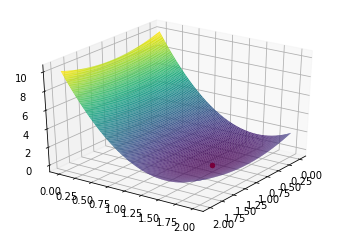

In [170]:
G,d = np.diag([2,8]), np.array([-2, -12])
Ginv = np.diag([1/2,1/8])
f = lambda x : 0.5*np.dot(x.T, np.dot(G,x)) + np.dot(d.T, x) + 10

fig = plt.figure()
ax = plt.axes(projection='3d')
XS, YS = np.linspace(0,2,100), np.linspace(0,2,100)
X,Y = np.meshgrid(XS, YS)

Z = np.zeros(shape=(100,100))
for i in range(X.shape[0]):
    for j in range(YS.shape[0]):
        Z[j,i] = f(np.array([XS[i], YS[j]]))
        
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.scatter(1, 3/2, 0, color="red")
ax.view_init(30, 35)

On prend pour commencer 3 inégalités qui délimitent une zone contenant le minimum global en $(1,3/2)$, par exemple :
$\left\{ \begin{array}{l} x \geq 1 \\ y \leq 2 \\ x+y \leq 4 \end{array} \right.$

Cela se traduit vectoriellement par $c(x,y) = 
\begin{pmatrix}
-1 & 0 \\
0 & 1 \\
1 & 1
\end{pmatrix}
\begin{pmatrix} x \\ y \end{pmatrix}
-
\begin{pmatrix} -1 \\ 2 \\ 4 \end{pmatrix}
\leq 0$

In [171]:
A,b = np.array([[-1,0],[0,1],[1,1]]), np.array([-1, 2, 4])

On lance alors l'algorithme

In [172]:
xetoile, letoile = Utawa(A, b, Ginv, d)
xetoile

Convergence en 90 iterations.


array([1.0000094, 1.5      ])

On constate donc bien que l'algorithme converge bien vers le minimum global de la fonction, qui était ici accessible. On remarque également que $\lambda^*$ est nulle, donc aucune des contraintes n'est actives.

Si l'on essaye à présent avec des contraintes qui ne sont pas cohérente avec le minimum global, imaginons $\left\{ \begin{array}{l} x \leq 2 \\ y \leq 1 \\ x+y \geq 1 \end{array} \right.$

Cela se traduit vectoriellement par $c(x,y) = 
\begin{pmatrix}
1 & 0 \\
0 & 1 \\
-1 & -1
\end{pmatrix}
\begin{pmatrix} x \\ y \end{pmatrix}
-
\begin{pmatrix} 2 \\ 1 \\ -1 \end{pmatrix}
\leq 0$

In [173]:
A,b = np.array([[1,0],[0,1],[-1,-1]]), np.array([2, 1, -1])
xetoile, letoile = Utawa(A, b, Ginv, d)
xetoile

Convergence en 375 iterations.


array([1.        , 1.00003955])

Si l'on essaye de tracer cette zone en rouge sur le dessin ci dessus, et que l'on plot le résultat de l'algorithme d'Utawa dessus, on constate graphiquement que l'on a bien trouvé le minimum recherché.

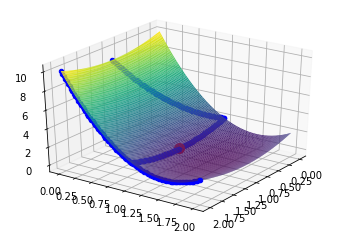

In [174]:
fig = plt.figure()
ax = plt.axes(projection='3d')
XS, YS = np.linspace(0,2,100), np.linspace(0,2,100)
X,Y = np.meshgrid(XS, YS)

Z = np.zeros(shape=(100,100))
for i in range(X.shape[0]):
    for j in range(YS.shape[0]):
        Z[j,i] = f(np.array([XS[i], YS[j]]))
        
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')

#On dessine la zone
for y in YS :
    ax.scatter(2, y,  f(np.array([2,y])), color="blue")
    if XS[0] < (1-y) < XS[-1]:
        ax.scatter(1-y, y,  f(np.array([1-y,y])), color="blue")
for x in XS :
    ax.scatter(x, 1,  f(np.array([x,1])), color="blue")
    if YS[0] < (1-x) < YS[-1]:
        ax.scatter(x, 1-x,  f(np.array([x,1-x])), color="blue")
    
ax.scatter(xetoile[0], xetoile[1], f(np.array([xetoile[0], xetoile[1]])), color="red", s=100)
ax.view_init(30, 35)

L'Algorithme semble donc fonctionnel.

### Partie 4 : résolution du problème
#### 1) Mise en place des variables
Nous utilisons les valeurs suivantes pour les différentes données du problème.
On se donne également $Q_{LB}^{i+1} = 1000$

| Produits       |     $P^i_k$    |   $Q^i_k$ | $e_k$ | $\alpha_k$ | $\tau_{g,k}$ | $\tau_{l,k}$
| ---------------|: ------------: | --------: |-----: |----------: |-----: |----------: |
| Beurre         |        54       |      4000 |-1.5 | 0.16 | 0.800 | 0.020 |
| Gouda          |        63      |      3250 |-0.7 | 0.16 | 0.306 | 0.297 |
| Edam           |        17       |     2500 |-0.4 | 0.4 | 0.241 | 0.371 |
| Lait transformé|        2055       | 400 | -0.3 | 0.64 | 0.026 | 0.086 |
| Lait Brut | - | - | - | - | 0.121 | 0.250 |

In [175]:
Pi = {"B" : 54, "G" : 63, "E" : 17, "LT" : 2055}
Qi = {"B" : 4000, "G" : 3250, "E" : 25000, "LT" : 400}
e = {"B" : -1.5, "G" : -0.7, "E" : -0.4, "LT" : -0.3}
alpha = {"B" : 0.16, "G" : 0.16, "E" : 0.4, "LT" : 0.64}
taug = {"B" : 0.8, "G" : 0.306, "E" : 0.241, "LT" : 0.026, "LB" : 0.121}
taul = {"B" : 0.02, "G" : 0.297, "E" : 0.371, "LT" : 0.086, "LB" : 0.250}

QLB = 1000

On peut à présent construire les différentes matrices.
On rappelle que :$$ \boxed{c^i(\vec{Q^{i+1}}) = A^i.Q^{i+1} - b^i \leq 0}$$
avec
$$ A^i = 
\begin{pmatrix}
-{e_1}^T \\ -{e_2}^T \\ -{e_3}^T \\ -{e_4}^T \\ {\tau_g}^T \\ {\tau_l}^T \\ {\alpha_i}^T
\end{pmatrix} = 
\begin{pmatrix}
-1&0&0&0 \\
0&-1&0&0 \\
0&0&-1&0 \\
0&0&0&-1 \\
\tau_{g,B} &\tau_{g,G} &\tau_{g,E} &\tau_{g,LT} \\
\tau_{l,B} &\tau_{l,G} &\tau_{l,E} &\tau_{l,LT} \\
\frac{\alpha_B}{Q_B^i e_B} & \frac{\alpha_G}{Q_G^i e_G} & \frac{\alpha_E}{Q_E^i e_E} & \frac{\alpha_{LT}}{Q_{LT}^i e_{LT}}
\end{pmatrix}
\text{ et }
b^i = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ \tau_{g,LB}Q_{LB}^{i+1} \\ \tau_{l,LB}Q_{LB}^{i+1} \\ C \end{pmatrix}
$$

In [176]:
A = np.array([
    [-1, 0, 0, 0],
    [0,-1, 0, 0],
    [0, 0,-1, 0],
    [0, 0, 0,-1],
    
    [taug["B"], taug["G"], taug["E"], taug["LT"]],
    [taul["B"], taul["G"], taul["E"], taul["LT"]],
    
    [alpha["B"]/(Qi["B"]*e["B"]), alpha["G"]/(Qi["G"]*e["G"]), alpha["E"]/(Qi["E"]*e["E"]), alpha["LT"]/(Qi["LT"]*e["LT"])]
])

C = sum([alpha[k]/e[k] for k in alpha])
b = np.array([0, 0, 0, 0, taug["LB"]*QLB, taul["LB"]*QLB, C])

Egalement, $$\boxed{ f(x) = \frac{1}{2}x^T.G^i.x + {d^i}^T.x}$$
avec :
- $d^i = (P^i - D^i Q^i) = (P^i + 0.5 G^i.Q^i)$
- $G^i = -2\times \text{Diag}\begin{pmatrix}
\frac{1}{e_B P_B^i Q_B^i} &
\frac{1}{e_G P_G^i Q_G^i} &
\frac{1}{e_E P_E^i Q_E^i} &
\frac{1}{e_{LT} P_{LT}^i Q_{LT}^i} 
\end{pmatrix}$.

On remarque néanmoins que $G^i$ n'est pas utile en pratique dans les calculs, c'est seulement ${G^i}^{-1}$ qui intervient. Ainsi, on va directement définir cette dernière, qui s'exprime donc comme :
$$ {G^i}^{-1} = -0.5\times \text{Diag}\begin{pmatrix}
{e_B P_B^i Q_B^i} &
{e_G P_G^i Q_G^i} &
{e_E P_E^i Q_E^i} &
{e_{LT} P_{LT}^i Q_{LT}^i}\end{pmatrix}$$

In [177]:
Ginv = -0.5*np.diag([e[k]*Pi[k]*Qi[k] for k in e])
d = np.array([Pi[k] for k in Pi]) + 0.5*np.dot(np.linalg.inv(Ginv), np.array([Qi[k] for k in Qi]))

Il ne reste plus qu'à utiliser l'algorithmme d'Utawa

In [178]:
Qetoile, letoile = Utawa(A, b, Ginv, d, Niter = 10**6, eps = 1e-15, tau= 1e-7)
Qetoile

Convergence en 4481 iterations.


array([9.24777055e-05, 2.43894132e-04, 1.38751055e-04, 1.84968790e-02])

On en déduit les prix de ventes en utilisant la relation $P_{k}^{i+1}=P_k^{i}+ \frac{1}{e_k P_k^i} \frac{Q_k^{i+1} - Q_k^i}{Q_k^i}$

In [179]:
Qi_1 = {"B" : Qetoile[0], "G" :  Qetoile[1], "E" :  Qetoile[2], "LT" :  Qetoile[3]}
Pi_1 = [Pi[k] + (1/(e[k]*Pi[k]))*(Qi_1[k]-Qi[k])/Qi[k] for k in Qi]
Pi_1

[54.01234567872692, 63.02267573525977, 17.14705882271323, 2055.0016219850086]